In [1]:
import pandas as pd
import numpy as np
import datetime
from dateutil.relativedelta import relativedelta
from datetime import date
import matplotlib.pyplot as plt

In [2]:
wine = pd.read_csv("Documents/winemag-data_first150k.csv")

In [3]:
wine.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [4]:
wine = wine.drop(['winery', 'region_1', 'region_2', 'designation'], axis=1)

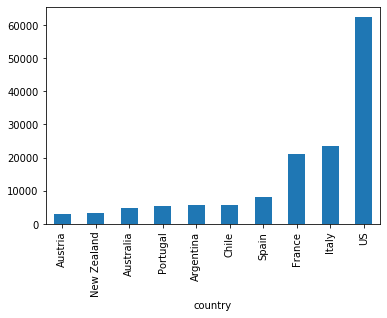

In [5]:
wine2 = wine.reset_index().groupby(['country'])['country'].count().sort_values().tail(10)
wine2.plot(kind='bar')
#sorting the wine counts by region, you can see that US is highest producing by a large amount

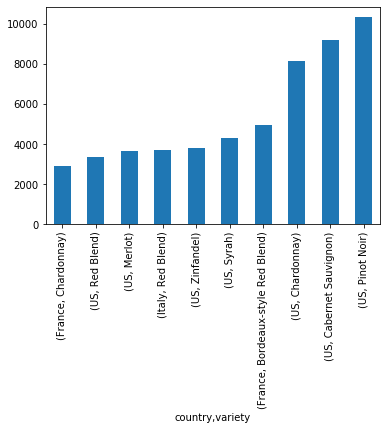

In [6]:
wine2 = wine.reset_index().groupby(['country', 'variety'])['country'].count().sort_values().tail(10)
wine2.plot(kind='bar')
#added in variety to see top wine types per regions - can see that pinot noir, cab sauv, and chardonnary are top from us. 
#france top wine is bordeaux 

In [7]:
wine.isna().any()
#quite a few columns with null values

Unnamed: 0     False
country         True
description    False
points         False
price           True
province        True
variety        False
dtype: bool

In [8]:
wine['country'].isna().sort_values().tail(20)
#looks like only 5 nans for country column - since data is 150K rows, going to ommit this potentially

50313     False
50301     False
50302     False
50303     False
50304     False
50305     False
50306     False
50314     False
50307     False
50308     False
50309     False
50310     False
50311     False
50312     False
150929    False
68226      True
1133       True
135696     True
1440       True
113016     True
Name: country, dtype: bool

In [9]:
wine['province'].isna().sort_values().tail(20)
#same as province, only a couple so may be removing

50313     False
50301     False
50302     False
50303     False
50304     False
50305     False
50306     False
50314     False
50307     False
50308     False
50309     False
50310     False
50311     False
50312     False
150929    False
68226      True
1133       True
135696     True
1440       True
113016     True
Name: province, dtype: bool

In [10]:
wine = wine.dropna(subset = ['country', 'province'])
wine.isna().any()
#can now see that only nans are price, which there are quite a few entries for. need to check further

Unnamed: 0     False
country        False
description    False
points         False
price           True
province       False
variety        False
dtype: bool

In [11]:
wine['price'].isna().sum()
#there are over 13000 nans for price, which is pretty high to ommit. Need to explore options for nans such as ffill or using an average to fill
#i am considering replacing the nan value with the mean but would may wanto to use the mean for each variety 

13695

In [12]:
np.mean(wine['price'])
#the mean price is 33.13 across all varieties

33.132019237776

In [13]:
wine['price'].describe()
#running summary statistics I can see the mean is 33 but the STD is 36, which is pretty high. I think it might be good to using mean by variety

count    137230.000000
mean         33.132019
std          36.323072
min           4.000000
25%          16.000000
50%          24.000000
75%          40.000000
max        2300.000000
Name: price, dtype: float64

In [14]:
wine['price'] = wine['price'].fillna(wine.groupby('variety')['price'].transform('mean'))
#fill nan values from the price column with mean price per variety - think this will be more accurate than just using a blanket mean 

In [15]:
wine['price'].describe()
#we can see mean and STD stay similiar, which is good as data was not changed much

count    150904.000000
mean         33.543657
std          34.950624
min           4.000000
25%          16.000000
50%          25.000000
75%          40.000000
max        2300.000000
Name: price, dtype: float64

In [16]:
wine.isna().any()
#checking for NANs left in the price column, I can see there are still some present. checking the value, they total to 21, which means these were unique varieties and did not have a similar wine to mirror

Unnamed: 0     False
country        False
description    False
points         False
price           True
province       False
variety        False
dtype: bool

In [17]:
wine['price'].isna().sum()
#due to the lower volume of nans persisting in the price column, I am going to drop these values. 

21

In [18]:
wine = wine.dropna(subset = ['price'])
wine.isna().any()
#can see that all NANs are removed from dataset 

Unnamed: 0     False
country        False
description    False
points         False
price          False
province       False
variety        False
dtype: bool

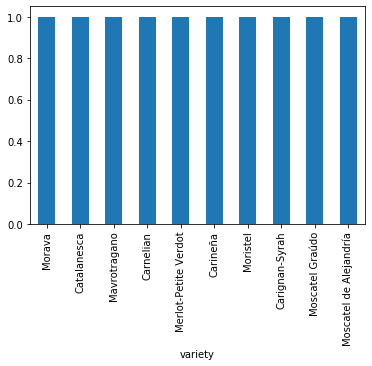

In [19]:
#want to do some exploration on the prices for varieties to see if there are potential outliers 
wine3 = wine.reset_index().groupby(['variety'])['variety'].count().sort_values()
wine3.head(10).plot(kind='bar')
#just doing some exploration there are definitely varietals that are region specific and thus have low counts

In [20]:
wine3.count() #shows 619 different varieties
wine3.describe()
#looking at some statisitics we can see that 75% of data is made up of varietals that have 38 reviews and the max is 14482 reviews
#also the mean is 243 which means there are on average 243 reviews for a given varietal
#the spread of data is very large as can be seen with a STD of 1228. 

count      619.000000
mean       243.786753
std       1228.558691
min          1.000000
25%          3.000000
50%          8.000000
75%         38.500000
max      14482.000000
Name: variety, dtype: float64

In [21]:
wine3.tail(20)
#you can see even just by looking at top 20 wine varietals, the range is quite large, ranging from 144482 - 1682 - outliers 
#could prove to be a problem but will re-evaluate once I begin the NLP section 

variety
Corvina, Rondinella, Molinara     1682
Shiraz                            1970
Sparkling Blend                   2004
Portuguese Red                    2216
Nebbiolo                          2241
Tempranillo                       2556
Rosé                              2817
White Blend                       2824
Malbec                            3208
Sangiovese                        3345
Zinfandel                         3799
Merlot                            5070
Riesling                          5524
Syrah                             5825
Sauvignon Blanc                   6320
Bordeaux-style Red Blend          7347
Red Blend                        10061
Cabernet Sauvignon               12800
Pinot Noir                       14288
Chardonnay                       14482
Name: variety, dtype: int64

In [22]:
#starting nlp section of EDA - going to play around with tokenization to see what results I get. also going to generate word clouds
import nltk.corpus
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
text = wine['description'].to_string()
tokens = [w for w in word_tokenize(text.lower())if w.isalpha()]

In [23]:
from collections import Counter
Counter(tokens).most_common(2)
#using counter on tokenized description column, and and a are most common so need to remove stopwords 

[('and', 63265), ('a', 62623)]

In [24]:
stops = set(stopwords.words("english"))
meaningful_words = [w for w in tokens if not w in stops]
Counter(meaningful_words).most_common(5)
#removed stopwords and can see top words are wine, aromas, ripe, blend, fruit. may want to remove wine, aromas, ripe, and blend
#as stop words since those are not very descriptive 

[('wine', 25218),
 ('aromas', 13006),
 ('ripe', 7584),
 ('blend', 6836),
 ('fruit', 6499)]

In [25]:
rem_words = ["wine", "aromas", "blend"]
stops = set(stopwords.words("english") + rem_words)
wine_words = [w for w in tokens if not w in stops]
Counter(wine_words).most_common(5)
#removed wine, aromas, ripe, blend, and fruit as stop words and can see nose, rich, dry, soft, sweet are comming up  - 
#think it might be good to look at a wordcloud to get a large overview of words. 

[('ripe', 7584),
 ('fruit', 6499),
 ('nose', 6106),
 ('rich', 6077),
 ('dry', 5628)]

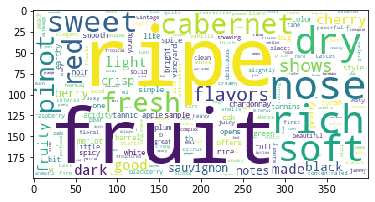

In [26]:
from wordcloud import WordCloud
wine_count = Counter(wine_words)
wc = WordCloud(background_color='white').generate_from_frequencies(wine_count)
plt.imshow(wc)
#made a word cloud of top words to see a larger picture - this is not focusing on specific varieties. Can see that nose, rich, dry
#are very popular. Soft, sweet, fresh cabernet are other wines. Need to remove other words such as shows, made, good, flavors to pick
#out the true descriptive words

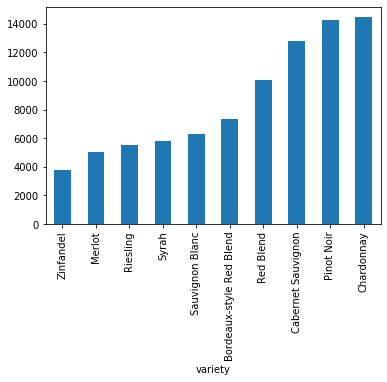

In [27]:
#lets look at top varieties and see if we can pull out most descriptive words
wine3.tail(10).plot(kind='bar')
#can see that chardonnary and pinot noir are most popular - let's look at those descriptive words

In [28]:
chard = wine[wine.variety == 'Chardonnay']
chard_text = chard['description'].to_string()
tokens = [w for w in word_tokenize(chard_text.lower())if w.isalpha()]
chard.head()

,Unnamed: 0,country,description,points,price,province,variety
15,15,US,"First made in 2006, this succulent luscious Ch...",95,90.0,Oregon,Chardonnay
23,23,US,The apogee of this ambitious winery's white wi...,95,60.0,California,Chardonnay
25,25,New Zealand,"Yields were down in 2015, but intensity is up,...",94,57.0,Kumeu,Chardonnay
31,31,US,"Steely and perfumed, this wine sees only 20% n...",90,37.0,California,Chardonnay
34,34,US,"The aromas entice with notes of wet stone, hon...",90,42.0,Washington,Chardonnay


In [29]:
chard_words = [w for w in tokens if not w in stops]
Counter(chard_words).most_common(5)
#so looking at top words, can see rich, chard, oak, nose, and apple - this is showing more descriptive words, which is good

[('chardonnay', 2079),
 ('ripe', 1112),
 ('rich', 953),
 ('fruit', 800),
 ('chard', 722)]

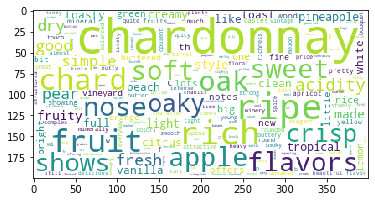

In [30]:
#chardonnay word cloud
chard_count = Counter(chard_words)
wc = WordCloud(background_color='white').generate_from_frequencies(chard_count)
plt.imshow(wc)
#word cloud is helping to show more trends in words, can see some descriptive words stand out like oak and apple
#may want to remove words like nose, rich, swee, soft as these are pretty generic 

In [31]:
chard_rem = ['nose', 'rich', 'shows', 'sweet', 'soft', 'flavors', 'chardonnay']
stops = set(stopwords.words("english") + chard_rem + rem_words)
chard_words = [w for w in tokens if not w in stops]
Counter(chard_words).most_common(10)
#after removing more stop words, can see that chard, oak, apple, crisp are some type descriptive words for chardonnay 
#will want to see if this can predict the wine type 

[('ripe', 1112),
 ('fruit', 800),
 ('chard', 722),
 ('oak', 658),
 ('apple', 577),
 ('crisp', 494),
 ('oaky', 484),
 ('acidity', 472),
 ('dry', 423),
 ('fresh', 401)]

In [32]:
#want to recreate the same steps for pinot noir which is the next popular wine type to see how the words differ - this is
#important to see if the descriptive words can be used to predict wine type
pinot = wine[wine.variety == 'Pinot Noir']
pinot_text = pinot['description'].to_string()
tokens = [w for w in word_tokenize(pinot_text.lower())if w.isalpha()]
pinot.head()

,Unnamed: 0,country,description,points,price,province,variety
3,3,US,"This spent 20 months in 30% new French oak, an...",96,65.0,Oregon,Pinot Noir
8,8,US,This re-named vineyard was formerly bottled as...,95,65.0,Oregon,Pinot Noir
9,9,US,The producer sources from two blocks of the vi...,95,60.0,California,Pinot Noir
11,11,US,"From 18-year-old vines, this supple well-balan...",95,48.0,Oregon,Pinot Noir
12,12,US,A standout even in this terrific lineup of 201...,95,48.0,Oregon,Pinot Noir


In [33]:
pinot_words = [w for w in tokens if not w in stops]
Counter(pinot_words).most_common(5)
#so looking at top words, can see pinot and noir are coming up - need to remove them - let's create a word cloud to see if anything else should be removed

[('pinot', 2908), ('noir', 1436), ('dry', 723), ('cherry', 716), ('ripe', 690)]

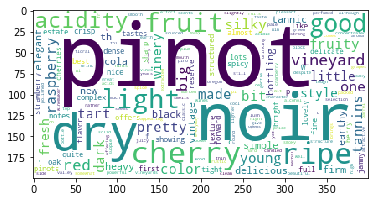

In [34]:
#pinot noir word cloud
pinot_count = Counter(pinot_words)
wc = WordCloud(background_color='white').generate_from_frequencies(pinot_count)
plt.imshow(wc)
#so can definitely see pinot noir neds to be removed, also need to remove good, acitiy, vineyard - i'm going to keep dry for now
#because i know this variety is a dry wine and may be somewhat descriptive 

In [35]:
pinot_rem = ['pinot', 'noir', 'good', 'vineyard', 'acidity', 'made']
stops = set(stopwords.words("english") + chard_rem + rem_words + pinot_rem)
pinot_words = [w for w in tokens if not w in stops]
Counter(pinot_words).most_common(10)
#after removing stop words, can see that cherry, dry, silky, raspberry, tart are some good descriptive words that differ from
#chardonnary - hopefully will be able to build models off of this 

[('dry', 723),
 ('cherry', 716),
 ('ripe', 690),
 ('fruit', 583),
 ('light', 535),
 ('red', 410),
 ('silky', 369),
 ('raspberry', 363),
 ('one', 354),
 ('big', 347)]

In [36]:
#from gensim.models.tfidfmodel import TfidfModel 
#from gensim.corpora.dictionary import Dictionary
#going to check out creating a corpus and tfidfmodel 
#tokenized_wine = set([word_tokenize(doc.lower())for doc in text])
#wine_dict = Dictionary(wine_words)

In [37]:
#model = TfidfModel(wine_count)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),
 <a list of 48 Text xticklabel objects>)

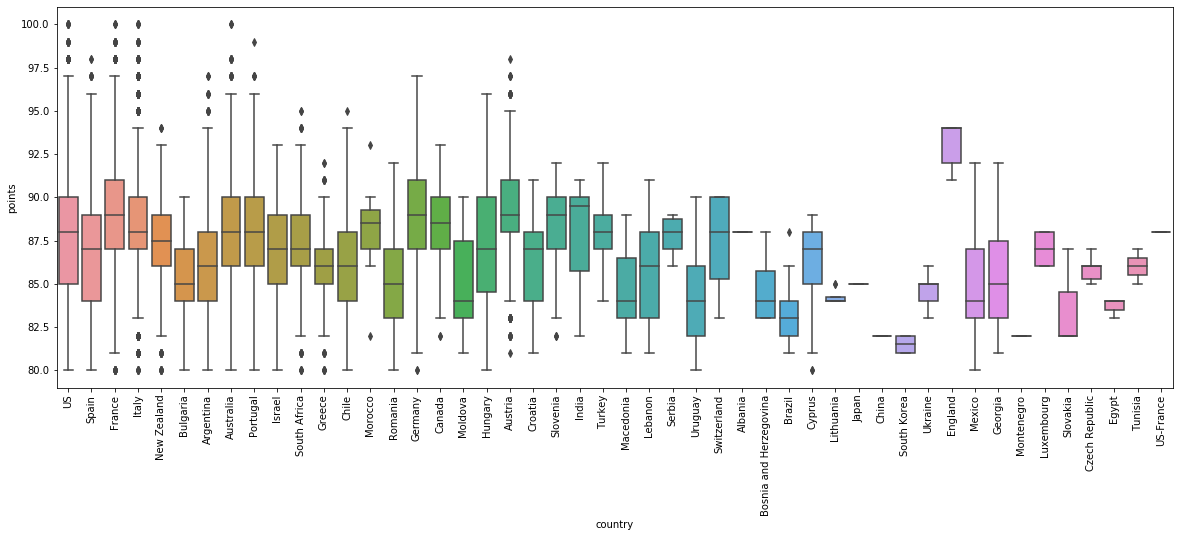

In [38]:
import seaborn as sns
fig, ax = plt.subplots(figsize = (20,7))
chart = sns.boxplot(x='country',y='points', data=wine, ax=ax)
plt.xticks(rotation = 90)
#wanted to do some comparison on points distributions for regions as this might be good to model along with the descriptions
#can see that US, France, and Italy have high ranking wines but also dont have necessarily high means

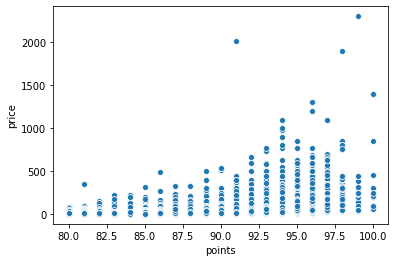

In [39]:
#also wanted to compare the points and prices to see if there is a correlation since I will need to do start some statisitcal testing
sns.scatterplot(y='price', x='points', data=wine)
#hard to tell if there is a correlation based on the outliers (there is a bottle wine priced at 2500), I'm going to remove 
#anything priced over 100 and re-graph

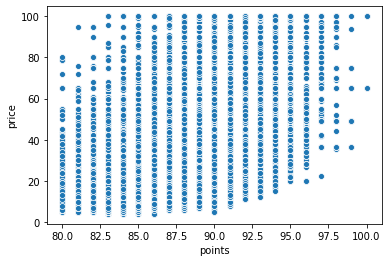

In [40]:
wine_scat = wine[wine.price <= 100]
sns.scatterplot(y='price', x='points', data=wine_scat)
#removing the outliers for price, we can see that there is a correlation between points and price so may be good to model

In [41]:
#want to look at the word cloud/ tokens for another popular variety (cab sauv)
cab_sauv = wine[wine.variety == 'Cabernet Sauvignon']
cab_text = cab_sauv['description'].to_string()
tokens = [w for w in word_tokenize(cab_text.lower())if w.isalpha()]

In [42]:
cab_words = [w for w in tokens if not w in stops]
Counter(cab_words).most_common(5)
#so similar to the above wines, need to remove the cab/ cabernet

[('cabernet', 2137),
 ('cab', 1123),
 ('ripe', 694),
 ('dry', 687),
 ('fruit', 535)]

In [43]:
cab_rem = ['cabernet', 'cab', 'sauvignon']
stops = set(stopwords.words("english") + chard_rem + rem_words + pinot_rem + cab_rem)
cab_words = [w for w in tokens if not w in stops]
Counter(cab_words).most_common(10)
#re-running the words, can see that we have good descriptive words now such as black, cherry, tannic, blackberry, dark

[('ripe', 694),
 ('dry', 687),
 ('fruit', 535),
 ('black', 451),
 ('cherry', 442),
 ('tannic', 420),
 ('blackberry', 416),
 ('tannins', 387),
 ('dark', 351),
 ('bit', 312)]

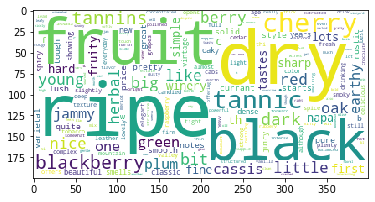

In [44]:
cab_count = Counter(cab_words)
wc = WordCloud(background_color='white').generate_from_frequencies(cab_count)
plt.imshow(wc)
#word cloud for cab sauv shows nice display, can also see herbal, jammy, plum, earthy are other big words 

In [45]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lacey\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [46]:
#going to try some text pre-processing steps before jumping into models
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
#def lemmatize_text(text):
   # return [lemmatizer.lemmatize(w) for w in wine_words]
lemmatized_output = [lemmatizer.lemmatize(w) for w in wine_words]

In [47]:
Counter(lemmatized_output).most_common(10)
#these are my lemmatized 10 most common words from the regular wine list. comparing with the original list, it does
#not look like this changed too much 

[('ripe', 7584),
 ('fruit', 7524),
 ('nose', 6109),
 ('rich', 6079),
 ('dry', 5628),
 ('soft', 5429),
 ('sweet', 5035),
 ('flavor', 4680),
 ('cabernet', 4448),
 ('show', 4302)]

In [48]:
#after performing lemmatization, going to also do word stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
ps = PorterStemmer()
stemmed_output = [ps.stem(w) for w in wine_words]

In [49]:
Counter(stemmed_output).most_common(10)

[('ripe', 7842),
 ('fruit', 7566),
 ('rich', 6603),
 ('dri', 6355),
 ('nose', 6117),
 ('soft', 5507),
 ('show', 5463),
 ('sweet', 5266),
 ('flavor', 5099),
 ('cabernet', 4448)]

In [50]:
#since we want to see the top descriptive words of high rated wines as the goal is to see top words that can be used to boost sales
#lets look at top words for wines rates 90 points and over 
wine7 = wine[wine.points >= 90]
rem_words = ["wine", "blend", "pinot", "chardonnay", "cabernet", "vineyard", "barrel", "show"]
stops2 = set(stopwords.words("english") + rem_words)
text = wine7['description'].to_string()
tokens = [w for w in word_tokenize(text.lower())if w.isalpha()]
cleaned_wine = [w for w in tokens if not w in stops2]

In [51]:
cleaned_output = [lemmatizer.lemmatize(w) for w in cleaned_wine]

In [52]:
cleaned_output = [ps.stem(w) for w in cleaned_output]

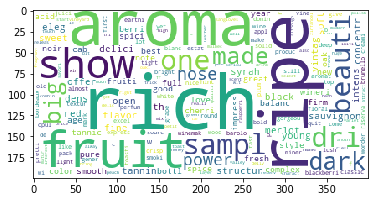

In [53]:
cleaned_count = Counter(cleaned_output)
wc = WordCloud(background_color='white').generate_from_frequencies(cleaned_count)
plt.imshow(wc)

In [54]:
#after performing preprocessing on the wine words - i'm going to put all of the steps together to create a cleaned list of words
#from the wine description set - from there, I can split up into top varieties like I did previously
rem_words = ["wine", "blend", "pinot", "chardonnay"]
stops2 = set(stopwords.words("english") + rem_words)
text = wine['description'].to_string()
tokens = [w for w in word_tokenize(text.lower())if w.isalpha()]
cleaned_wine = [w for w in tokens if not w in stops2]

In [55]:
#lemmatizing step
cleaned_output = [lemmatizer.lemmatize(w) for w in cleaned_wine]

In [56]:
#stemming step
cleaned_output = [ps.stem(w) for w in cleaned_output]

In [57]:
Counter(cleaned_output).most_common(5)
#so after performing pre-processing on wine data, we can see aroma, ripe, fruit, rich are top words. Also dri is showing up
#why is the stem of dry based on previous data - lets word cloud this 

[('aroma', 13921),
 ('ripe', 7842),
 ('fruit', 7566),
 ('rich', 6603),
 ('dri', 6355)]

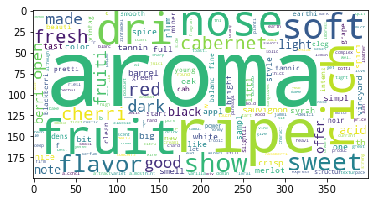

In [58]:
cleaned_count = Counter(cleaned_output)
wc = WordCloud(background_color='white').generate_from_frequencies(cleaned_count)
plt.imshow(wc)
#looking at the word cloud, there are some words that may want to consider removing due to vagueness such as aroma, rich, ripe
#soft, show, cabernet - these are not very descriptive and may pose problems once modeling. 
#also may want to perform pre-processing steps on popular varietals like chardonnay and pinot noir to perform modeling on them 
#to get variety specific data

In [59]:
#going to recreate the steps but remove some additional stop words so that I can use this set of words for my stats section
rem_words2 = ["wine", "blend", "pinot", "chardonnay", "cabernet", "aroma", "show"]

In [60]:
stops3 = set(stopwords.words("english") + rem_words2)

In [61]:
text = wine['description'].to_string()

In [62]:
tokens2 = [w for w in word_tokenize(text.lower())if w.isalpha()]

In [63]:
cleaned_wine2 = [w for w in tokens2 if not w in stops3]

In [64]:
cleaned_output2 = [lemmatizer.lemmatize(w) for w in cleaned_wine2]

In [65]:
#cleaned_output2 = [ps.stem(w) for w in cleaned_output2]
#removing the stemming attribute as not effective for this dataset - 
#lemmatizing is more effective 

In [66]:
Counter(cleaned_output2).most_common(10)

[('aroma', 13006),
 ('ripe', 7584),
 ('fruit', 7524),
 ('nose', 6109),
 ('rich', 6079),
 ('dry', 5628),
 ('soft', 5429),
 ('sweet', 5035),
 ('flavor', 4680),
 ('cherry', 4177)]

In [67]:
cleaned_count = Counter(cleaned_output2)

In [68]:
descList = list()
desc = " ".join(cleaned_output2) 
descList.append(desc)

In [69]:
#lets make a list of top 1500 words to use for predictions 
from sklearn.feature_extraction.text import CountVectorizer
max_features = 1500
count_vectorizer = CountVectorizer(max_features=max_features)
sparce_matrix = count_vectorizer.fit_transform(descList)

In [70]:
sparce_matrix = sparce_matrix.toarray()

In [71]:
print("Most Frequent {} Words: {}".format(max_features, count_vectorizer.get_feature_names()))

Most Frequent 1500 Words: ['absolutely', 'ac', 'accent', 'accented', 'accessible', 'aci', 'acid', 'acidi', 'acidic', 'acidit', 'acidity', 'across', 'add', 'added', 'addition', 'affordable', 'age', 'aged', 'aggressive', 'aging', 'aglianico', 'air', 'al', 'albariño', 'alcohol', 'alluring', 'almond', 'almost', 'along', 'alongside', 'already', 'also', 'although', 'always', 'amarone', 'amazing', 'amber', 'ambitious', 'american', 'among', 'amount', 'ample', 'angular', 'animal', 'anise', 'another', 'ap', 'apart', 'app', 'appeal', 'appealing', 'appearance', 'appears', 'appellation', 'appl', 'apple', 'approach', 'approachable', 'apricot', 'ar', 'area', 'aro', 'arom', 'aroma', 'aromatic', 'aromatically', 'aromatics', 'around', 'asian', 'asphalt', 'assertive', 'astringent', 'attractive', 'attractively', 'austere', 'available', 'away', 'awkward', 'ba', 'back', 'backed', 'bacon', 'bad', 'baked', 'baking', 'balance', 'balanced', 'balsam', 'balsamic', 'banana', 'bar', 'barbaresco', 'barbera', 'barely

In [72]:
#going to use lambda functions because need to add these descriptions back into original dataset for analysis
import re
wine['description']= wine['description'].str.lower()
wine['description']= wine['description'].apply(lambda elem: re.sub('[^a-zA-Z]',' ', elem))

In [73]:
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
wine_descriptions = wine['description'].apply(tokenizer.tokenize)
wine_descriptions.head()

0    [this, tremendous, varietal, wine, hails, from...
1    [ripe, aromas, of, fig, blackberry, and, cassi...
2    [mac, watson, honors, the, memory, of, a, wine...
3    [this, spent, months, in, new, french, oak, an...
4    [this, is, the, top, wine, from, la, b, gude, ...
Name: description, dtype: object

In [74]:
stopword_list = stopwords.words('english')
ps = PorterStemmer()
wine_descriptions = wine_descriptions.apply(lambda elem: [word for word in elem if not word in stopword_list])
wine_descriptions = wine_descriptions.apply(lambda elem: [ps.stem(word) for word in elem])
wine['description_cleaned'] = wine_descriptions.apply(lambda elem: ' '.join(elem))
#the description cleaned column can be used now for inferential stats  and modeling

In [75]:
wine.head()

,Unnamed: 0,country,description,points,price,province,variety,description_cleaned
0,0,US,this tremendous varietal wine hails from ...,96,235.0,California,Cabernet Sauvignon,tremend variet wine hail oakvil age three year...
1,1,Spain,ripe aromas of fig blackberry and cassis are ...,96,110.0,Northern Spain,Tinta de Toro,ripe aroma fig blackberri cassi soften sweeten...
2,2,US,mac watson honors the memory of a wine once ma...,96,90.0,California,Sauvignon Blanc,mac watson honor memori wine made mother treme...
3,3,US,this spent months in new french oak an...,96,65.0,Oregon,Pinot Noir,spent month new french oak incorpor fruit ponz...
4,4,France,this is the top wine from la b gude named aft...,95,66.0,Provence,Provence red blend,top wine la b gude name highest point vineyard...


In [76]:
#scatter plot of price verse 

In [77]:
#based on the course work, I can train supervised learning models using my bag of words data or tf-idf. since I created bag of words
#I think I will use those models 
#inferential stat section - since I saw that points and price seemed pretty correlated, going to run some stats on this
cov_matrix = np.cov(wine['price'], wine['points'])
wine_cov = cov_matrix[0,1]
print(wine_cov)
#covariance shows these variables are related although not as strongly as expected

50.8075962297653


In [78]:
from scipy.stats import linregress
linregress(wine['price'], wine['points'])
#getting some summary stats from linregress, we can see the r-value is .45 so these variables are moderately correlated

LinregressResult(slope=0.04159286025495854, intercept=86.49342803018081, rvalue=0.45112003306666804, pvalue=0.0, stderr=0.00021182125388657626)

In [79]:
#pearson coefficient
from scipy import stats
stats.pearsonr(wine['price'], wine['points'])

(0.4511200330666678, 0.0)

In [80]:
#spearman coefficient
stats.spearmanr(wine['price'], wine['points'])
#we see that the spearman coefficient is the highest at .587

SpearmanrResult(correlation=0.587909821009001, pvalue=0.0)

In [81]:
#going to do some poisson distributions focused on wine price - going to adjust the points to see the difference
wine_mean = np.mean(wine['price'])
wine_pois = np.random.poisson(wine_mean, size=10000)
print(wine_mean)
#so the mean price of all wines - 33.5

33.54365718268387


In [82]:
print(np.mean(wine_pois)) 
#the poisson distribution also returned a mean of 33.5

33.602


In [83]:
#let's look at the price for wines that have a point 90 and greater to see the difference
wine_great = wine[wine.points >= 90]
wine_great = wine_great['price']
wine_great_mean = np.mean(wine_great)
print(wine_great_mean)
#the mean price for wines 90 points and higher is 52.7, so considerably higher

52.71096624716112


In [84]:
wine_great_pois = np.random.poisson(wine_great_mean, size=10000)
print(np.mean(wine_great_pois))
#we can see the mean of the poisson distribution is very similiar 

52.6226


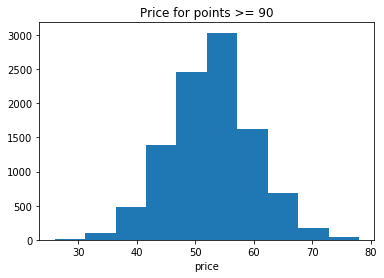

In [85]:
_ = plt.hist(wine_great_pois)
_ = plt.xlabel("price")
_ = plt.title("Price for points >= 90")
plt.show()
#we can see looking at the poisson distribution that the maority is between closely centered around that 45 - 62 range

In [86]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

In [87]:
wine_great.sort_values().tail(20)

41524      800.0
32453      800.0
119524     800.0
2145       848.0
10505      850.0
28625      850.0
127773     850.0
90744      900.0
10886      980.0
35531     1000.0
10651     1100.0
34927     1100.0
34942     1200.0
34939     1300.0
83536     1400.0
26296     1400.0
51886     1400.0
34922     1900.0
13318     2013.0
34920     2300.0
Name: price, dtype: float64

In [88]:
wine_great.describe()
#looking at the wine price data greater than 90 points, we can see that the max price is 2300 and low is 5 so very large spread. 
#the top 20 most expensive range from 800-2300 - definitely throwing data off since STD is so high, it is equal to the mean

count    48203.000000
mean        52.710966
std         52.069572
min          5.000000
25%         29.000000
50%         42.000000
75%         60.000000
max       2300.000000
Name: price, dtype: float64

In [89]:
#wanted to compute PMF/ ECDF for the wines with points over 90 but am getting a very large STD - i'm going to remove outlier
wine_great_mean = np.mean(wine_great)
wine_std = np.std(wine_great)
wine_dist = np.random.normal(wine_great_mean, wine_std, size=10000)

C:\Users\lacey\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


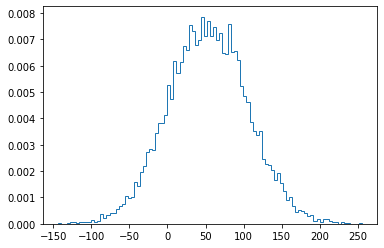

In [90]:
_ = plt.hist(wine_dist, normed=True, histtype='step', bins=100)
#you can see the data is coming out odd since the STD is so high - we have some negative numbers so need to remove outliers

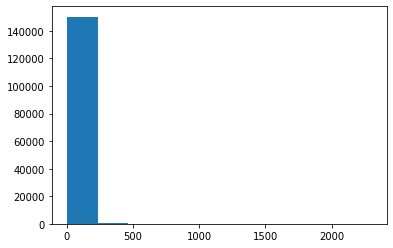

In [91]:
#going to plot the prices to see what the distribution looks like - you can see majority is below 500 - going to remove anything
#above 500
_ = plt.hist(wine['price'])
plt.show()

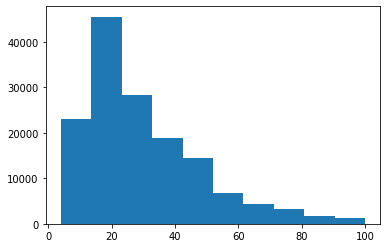

In [92]:
wine6 = wine[wine.price <= 100]
_ = plt.hist(wine6['price'])
plt.show()
#distribution looks better but still some outlies beyond 100

In [93]:
#performing random distribution 
wineg = wine[wine.points >= 90]
wineg = wine[wine.price <=500]
wineg = wine['price']
wine_great_mean6 = np.mean(wineg)
wine_std6 = np.std(wineg)
wine_dist6 = np.random.normal(wine_great_mean6, wine_std6, size=10000)

C:\Users\lacey\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


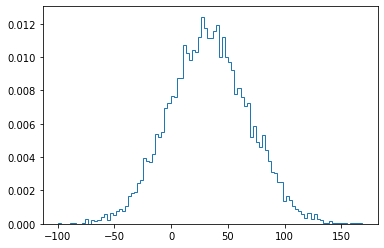

In [94]:
_ = plt.hist(wine_dist6, normed=True, histtype='step', bins=100)

In [95]:
#going to also do some bootstrapping of the prices greater than 90 since the data is so widespread
Replications = np.array([np.random.choice(wine_great, len(wine_great), replace = True) for _ in range(10000)])
Mean = np.mean(Replications, axis=1)
conf_int = np.percentile(Mean, [2.5, 97.5])
print(conf_int)
#we can see after bootstrapping that the confidence is 52.2 to 53.2

[52.25415878 53.16874204]


In [96]:
print(wine_std6)

34.95050793742128


In [97]:
wineg.describe()

count    150904.000000
mean         33.543657
std          34.950624
min           4.000000
25%          16.000000
50%          25.000000
75%          40.000000
max        2300.000000
Name: price, dtype: float64

In [98]:
#ANOVA test doing first one on price and variety
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
results = ols('price ~ variety', data=wine).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     29.99
Date:                Fri, 13 Mar 2020   Prob (F-statistic):               0.00
Time:                        20:25:33   Log-Likelihood:            -7.4165e+05
No. Observations:              150904   AIC:                         1.485e+06
Df Residuals:                  150285   BIC:                         1.491e+06
Df Model:                         618                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [99]:
aov_table = sm.stats.anova_lm(results, typ=2)
aov_table
#so looking at the OLS table - the r**2 is pretty low .110 so doesnt seem to correlated - also looking at the annova summary table 
#sum of squares is very low and variance is high. probablity is also low

,sum_sq,df,F,PR(>F)
variety,2.023507e+07,618.0,29.986353,0.0
Residual,1.640999e+08,150285.0,NaN,NaN


In [100]:
#lets try looking at different factors such as points and province to see if these are related
results2 = ols('points ~ province', data=wine).fit()

In [ ]:
print(results2.summary())

In [101]:
aov_table2 = sm.stats.anova_lm(results2, typ=2)
aov_table2
#so it actually looks like these are less correlated 

,sum_sq,df,F,PR(>F)
province,1.966595e+05,454.0,47.558573,0.0
Residual,1.370312e+06,150449.0,NaN,NaN


In [ ]:
results3 = ols('points ~ variety', data=wine).fit()
print(results3.summary())

In [ ]:
aov_table3 = sm.stats.anova_lm(results3, typ=2)
aov_table3

In [104]:
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                 points   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     27.17
Date:                Fri, 13 Mar 2020   Prob (F-statistic):               0.00
Time:                        20:26:09   Log-Likelihood:            -3.8271e+05
No. Observations:              150904   AIC:                         7.667e+05
Df Residuals:                  150285   BIC:                         7.728e+05
Df Model:                         618                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

Pearson Correlation: (0.4511200330666678, 0.0)
                                 OLS Regression Results                                
Dep. Variable:                 points   R-squared (uncentered):                   0.495
Model:                            OLS   Adj. R-squared (uncentered):              0.495
Method:                 Least Squares   F-statistic:                          1.482e+05
Date:                Fri, 13 Mar 2020   Prob (F-statistic):                        0.00
Time:                        20:26:11   Log-Likelihood:                     -8.3806e+05
No. Observations:              150904   AIC:                                  1.676e+06
Df Residuals:                  150903   BIC:                                  1.676e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0

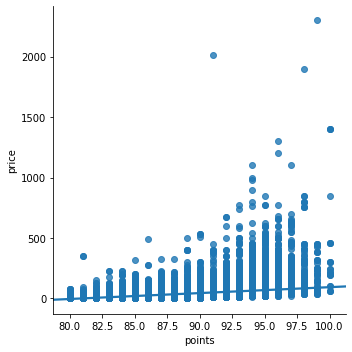

In [105]:
#let's see how price and points are correlated
from scipy.stats import pearsonr
print("Pearson Correlation:", pearsonr(wine.price, wine.points))
print(sm.OLS(wine.points, wine.price).fit().summary())
sns.lmplot(y = 'price', x='points', data=wine)
#we can see nice correlation between price and points - .495 r squared

In [106]:
#when trying to run ANOVA test on description_cleaned - getting memory error - need to see how to work around this
#created bag of words but cant run anova with that as not part of dataset
#lets use count vectorizer along with train test split to see if description can be used to predict variety
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
y = wine['variety']
X_train, X_test, y_train, y_test = train_test_split(wine['description'], y, test_size=0.33, random_state=53)


In [107]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train.values)
count_test = count_vectorizer.transform(X_test.values) 

In [108]:
#lets see how predictive this is 
from sklearn.naive_bayes import MultinomialNB 
from sklearn import metrics
nb_classifier = MultinomialNB()
nb_classifier.fit(count_train, y_train)
pred = nb_classifier.predict(count_test)
metrics.accuracy_score(y_test, pred)
#can see accuracy score is 53% based on classifier used comparing wine description to variety - decent score right off the bat

0.5341472720335749

In [109]:
#lets stry to run same naives bayes model on the cleaned description column I created to see if that increases the accuracy
X_train, X_test, y_train, y_test = train_test_split(wine['description_cleaned'], y, test_size=0.33, random_state=53)
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train.values)
count_test = count_vectorizer.transform(X_test.values)

In [110]:
nb_classifier = MultinomialNB()
nb_classifier.fit(count_train, y_train)
pred = nb_classifier.predict(count_test)
metrics.accuracy_score(y_test, pred)
#we can see the accuracy score increased slightly using the stemmed/ pre-processed data

0.539910439968674

In [111]:
#modeling with NB is pretty good with cleaned column created - variety and description have a good relationship - need to see what
#modeling can be done with the bag of words I have created - also may want to do some linear regressions on points and price as they 
#had a strong correlation
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
x = wine['points']
y = wine['price']
x = x.values.reshape(-1,1)
y = y.values.reshape(-1,1)
x = preprocessing.scale(x)
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
LN = LinearRegression()
LN.fit(X_train, y_train)
y_pred = (LN.predict(X_test))
r2_score(y_test, y_pred)
#looking at the linear regression for points and price, they have a fairly low r**2 but seems like price outliers are throwing off
#going to remove and re-run

0.19730547232986761

In [112]:
#re-running regression with price outliers removed
x = wine6['points']
y = wine6['price']
x = x.values.reshape(-1,1)
y = y.values.reshape(-1,1)
x = preprocessing.scale(x)
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
LN = LinearRegression()
LN.fit(X_train, y_train)
y_pred = (LN.predict(X_test))
r2_score(y_test, y_pred)
#I can see that removing outliers has increased R**2 - could still remove some outliers as seems majority are not over 100 USD 

0.2959810954689801

In [113]:
#running the naives bayes classifier, I saw that description is correlated to variety - lets see if the description is correlated
#to other features such as points/ price
y = wine['points']
X_train, X_test, y_train, y_test = train_test_split(wine['description_cleaned'], y, test_size=0.33, random_state=53)
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train.values)
count_test = count_vectorizer.transform(X_test.values)

In [114]:
nb_classifier = MultinomialNB()
nb_classifier.fit(count_train, y_train)
pred = nb_classifier.predict(count_test)
metrics.accuracy_score(y_test, pred)
#so the accuracy is not so high between description and points 

0.28424265547500954

In [115]:
#I also want to eplore the relationship between points and region to see the relationship
y = wine['points']
X_train, X_test, y_train, y_test = train_test_split(wine['country'], y, test_size=0.33, random_state=53)
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train.values)
count_test = count_vectorizer.transform(X_test.values)

In [116]:
nb_classifier = MultinomialNB()
nb_classifier.fit(count_train, y_train)
pred = nb_classifier.predict(count_test)
metrics.accuracy_score(y_test, pred)
#running the data, it doesn't seem like there is a strong correlation but want to try regions next

0.1390790979738549

In [117]:
#regions and points to see if there is a correlation 
y = wine['points']
X_train, X_test, y_train, y_test = train_test_split(wine['province'], y, test_size=0.33, random_state=53)
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train.values)
count_test = count_vectorizer.transform(X_test.values)

In [118]:
nb_classifier = MultinomialNB()
nb_classifier.fit(count_train, y_train)
pred = nb_classifier.predict(count_test)
metrics.accuracy_score(y_test, pred)
#so we see that there is a relationship between points and regions but not a super strong one. 

0.14897889515853732

In [119]:
#let's do a tf-idf model to see most important words 
from gensim.corpora.dictionary import Dictionary
wine_dict = Dictionary(wine_descriptions)

C:\Users\lacey\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [120]:
wine_dict.token2id

{'age': 0,
 'ahead': 1,
 'background': 2,
 'balanc': 3,
 'caramel': 4,
 'cherri': 5,
 'compel': 6,
 'develop': 7,
 'eleg': 8,
 'enjoy': 9,
 'fine': 10,
 'finish': 11,
 'frame': 12,
 'fruit': 13,
 'greet': 14,
 'hail': 15,
 'hint': 16,
 'juici': 17,
 'minti': 18,
 'nuanc': 19,
 'oak': 20,
 'oakvil': 21,
 'palat': 22,
 'red': 23,
 'reward': 24,
 'start': 25,
 'subtl': 26,
 'tannin': 27,
 'three': 28,
 'tone': 29,
 'tremend': 30,
 'variet': 31,
 'wine': 32,
 'year': 33,
 'aroma': 34,
 'bake': 35,
 'black': 36,
 'blackberri': 37,
 'cassi': 38,
 'chocol': 39,
 'chocolati': 40,
 'cushion': 41,
 'drink': 42,
 'everlast': 43,
 'fig': 44,
 'flavor': 45,
 'full': 46,
 'headi': 47,
 'ideal': 48,
 'intens': 49,
 'layer': 50,
 'oaki': 51,
 'rich': 52,
 'ripe': 53,
 'slather': 54,
 'soften': 55,
 'spice': 56,
 'sweeten': 57,
 'toasti': 58,
 'vanilla': 59,
 'botrytis': 60,
 'color': 61,
 'complex': 62,
 'compot': 63,
 'dark': 64,
 'delici': 65,
 'g': 66,
 'gold': 67,
 'hazelnut': 68,
 'honor': 69,
 '

In [121]:
#creating the corpus
corpus = [wine_dict.doc2bow(doc) for doc in wine_descriptions]

In [122]:
from gensim.models.tfidfmodel import TfidfModel
tfidf = TfidfModel(corpus)
tfidf[corpus[1]]
#have built corpus and TfidModel - need to explore top important words 

[(3, 0.09819021765829829),
 (11, 0.05379770987500057),
 (13, 0.03827022257220438),
 (22, 0.07355566672757846),
 (34, 0.06315802962024747),
 (35, 0.15837681294245257),
 (36, 0.08286314997278198),
 (37, 0.09193081424645497),
 (38, 0.14129625220352865),
 (39, 0.1126266839614512),
 (40, 0.22134744576554485),
 (41, 0.2909289385893561),
 (42, 0.0756767722408199),
 (43, 0.4595047731293849),
 (44, 0.19791715394519543),
 (45, 0.02731039768450058),
 (46, 0.1059949346951305),
 (47, 0.2563609000270334),
 (48, 0.27382163068260956),
 (49, 0.12458483276670589),
 (50, 0.14378663380080142),
 (51, 0.17356872831245193),
 (52, 0.07979639801796024),
 (53, 0.07579960375596557),
 (54, 0.3466351507785532),
 (55, 0.19939710080709785),
 (56, 0.07734751635746875),
 (57, 0.2797110395399278),
 (58, 0.16463333199844207),
 (59, 0.10732142607240898)]

In [123]:
tfidf_corp = tfidf[corpus[1]]

In [124]:
tfidf_corp.sort()
print(tfidf_corp)

[(3, 0.09819021765829829), (11, 0.05379770987500057), (13, 0.03827022257220438), (22, 0.07355566672757846), (34, 0.06315802962024747), (35, 0.15837681294245257), (36, 0.08286314997278198), (37, 0.09193081424645497), (38, 0.14129625220352865), (39, 0.1126266839614512), (40, 0.22134744576554485), (41, 0.2909289385893561), (42, 0.0756767722408199), (43, 0.4595047731293849), (44, 0.19791715394519543), (45, 0.02731039768450058), (46, 0.1059949346951305), (47, 0.2563609000270334), (48, 0.27382163068260956), (49, 0.12458483276670589), (50, 0.14378663380080142), (51, 0.17356872831245193), (52, 0.07979639801796024), (53, 0.07579960375596557), (54, 0.3466351507785532), (55, 0.19939710080709785), (56, 0.07734751635746875), (57, 0.2797110395399278), (58, 0.16463333199844207), (59, 0.10732142607240898)]


In [125]:
import operator
list1 = sorted(tfidf_corp, key=operator.itemgetter(1))
print(list1)
#got list of words from tfidf model sorted by score - need to cross reference scores with corpus index to see top words 

[(45, 0.02731039768450058), (13, 0.03827022257220438), (11, 0.05379770987500057), (34, 0.06315802962024747), (22, 0.07355566672757846), (42, 0.0756767722408199), (53, 0.07579960375596557), (56, 0.07734751635746875), (52, 0.07979639801796024), (36, 0.08286314997278198), (37, 0.09193081424645497), (3, 0.09819021765829829), (46, 0.1059949346951305), (59, 0.10732142607240898), (39, 0.1126266839614512), (49, 0.12458483276670589), (38, 0.14129625220352865), (50, 0.14378663380080142), (35, 0.15837681294245257), (58, 0.16463333199844207), (51, 0.17356872831245193), (44, 0.19791715394519543), (55, 0.19939710080709785), (40, 0.22134744576554485), (47, 0.2563609000270334), (48, 0.27382163068260956), (57, 0.2797110395399278), (41, 0.2909289385893561), (54, 0.3466351507785532), (43, 0.4595047731293849)]


In [126]:
np.array(list1)
#looking at the array of scores, we can see that that tops are index 43, 54, 41, 57 

array([[4.50000000e+01, 2.73103977e-02],
       [1.30000000e+01, 3.82702226e-02],
       [1.10000000e+01, 5.37977099e-02],
       [3.40000000e+01, 6.31580296e-02],
       [2.20000000e+01, 7.35556667e-02],
       [4.20000000e+01, 7.56767722e-02],
       [5.30000000e+01, 7.57996038e-02],
       [5.60000000e+01, 7.73475164e-02],
       [5.20000000e+01, 7.97963980e-02],
       [3.60000000e+01, 8.28631500e-02],
       [3.70000000e+01, 9.19308142e-02],
       [3.00000000e+00, 9.81902177e-02],
       [4.60000000e+01, 1.05994935e-01],
       [5.90000000e+01, 1.07321426e-01],
       [3.90000000e+01, 1.12626684e-01],
       [4.90000000e+01, 1.24584833e-01],
       [3.80000000e+01, 1.41296252e-01],
       [5.00000000e+01, 1.43786634e-01],
       [3.50000000e+01, 1.58376813e-01],
       [5.80000000e+01, 1.64633332e-01],
       [5.10000000e+01, 1.73568728e-01],
       [4.40000000e+01, 1.97917154e-01],
       [5.50000000e+01, 1.99397101e-01],
       [4.00000000e+01, 2.21347446e-01],
       [4.700000

In [127]:
full_tfidf_corp = tfidf[corpus]
list2 = sorted(full_tfidf_corp, key=operator.itemgetter(1))

In [128]:
min(list2)

[(0, 0.04892858028125803),
 (10, 0.057775321541650194),
 (13, 0.017799175083674467),
 (27, 0.03159333693194281),
 (32, 0.013673755719085967),
 (33, 0.04727356515042159),
 (36, 0.03853898972151619),
 (52, 0.03711266786307687),
 (125, 0.09738537944921981),
 (142, 0.06127077760267562),
 (187, 0.07825661333922346),
 (195, 0.050717837631558814),
 (255, 0.04991586615060638),
 (288, 0.0459493601836181),
 (304, 0.07714146580844511),
 (438, 0.09113632239246329),
 (450, 0.06876921900536818),
 (454, 0.05846063539040558),
 (560, 0.0724240918602757),
 (615, 0.1123283852332033),
 (641, 0.07071737127390078),
 (667, 0.10059679778930361),
 (689, 0.16766536471441137),
 (764, 0.06691214298658178),
 (915, 0.08538078517721462),
 (917, 0.11260985037671899),
 (1026, 0.10476226067285493),
 (1028, 0.08008010330764216),
 (1327, 0.09289546506669444),
 (1454, 0.09102493156872184),
 (1545, 0.09396843408138938),
 (1591, 0.13935156697484688),
 (1881, 0.14016874615272784),
 (2008, 0.09632567240918163),
 (2048, 0.1085

In [129]:
#full_tfidf_corp.values.reshape(-1, 1)
#max(full_tfidf_corp, key=operator.itemgetter(1))

AttributeError: 'TransformedCorpus' object has no attribute 'values'

In [ ]:
#max(list2)

In [130]:
#tried different ways of getting tfidf model to show values listed in ascending order, but not showing in matrix like desired
#going to try to vectorizer to see if that gets me a list that is cleaned 
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
matrix = vectorizer.fit_transform(wine['description_cleaned'])

In [131]:
for i, feature in enumerate(vectorizer.get_feature_names()):
    print(i, feature)

0 aa
1 aah
2 aalto
3 aand
4 aaron
5 abacela
6 abad
7 abadia
8 abandon
9 abarbanel
10 abat
11 abbacchio
12 abbay
13 abbey
14 abbinar
15 abboccato
16 abbona
17 abbott
18 abbrevi
19 abbruzzo
20 abbuoto
21 abc
22 abe
23 abeil
24 abeja
25 abernathi
26 aberr
27 abetina
28 abey
29 abid
30 abil
31 abl
32 abli
33 abnorm
34 aboard
35 abondant
36 abord
37 abound
38 abouri
39 abracadabra
40 abras
41 abraxa
42 abreu
43 abrigo
44 abroad
45 abrupt
46 abruptli
47 abruzzi
48 abruzzo
49 absenc
50 absens
51 absent
52 absolut
53 absorb
54 absorbingli
55 abstberg
56 absurd
57 absurdli
58 abtsberg
59 abund
60 abundantli
61 abupt
62 abus
63 abut
64 abv
65 abyss
66 ac
67 acacia
68 academ
69 acai
70 acat
71 acccess
72 acceler
73 accent
74 accentu
75 accept
76 access
77 accessibil
78 accessor
79 acciaiolo
80 accid
81 acciderba
82 acclaim
83 accolad
84 accommod
85 accompani
86 accompina
87 accomplish
88 accompnai
89 accord
90 accordingli
91 accordini
92 accordion
93 account
94 accpet
95 accru
96 accumul
97 accur

1441 barebecu
1442 barebon
1443 barefoot
1444 barelli
1445 barest
1446 barg
1447 bargain
1448 bargetto
1449 bariton
1450 bark
1451 barker
1452 barki
1453 barlett
1454 barley
1455 barlow
1456 barltett
1457 barn
1458 barnard
1459 barnaut
1460 barnett
1461 barnyard
1462 barnyardi
1463 barocca
1464 barocco
1465 barolo
1466 baroloesqu
1467 baron
1468 baroqu
1469 barossa
1470 barossan
1471 barr
1472 barra
1473 barrant
1474 barrel
1475 barrelli
1476 barrett
1477 barri
1478 barriano
1479 barrica
1480 barrier
1481 barriqu
1482 barrist
1483 barro
1484 barroca
1485 barruol
1486 barsac
1487 barsaglina
1488 barsotti
1489 bart
1490 bartholemew
1491 bartholom
1492 bartlett
1493 bartolo
1494 barton
1495 barvil
1496 basa
1497 basalt
1498 basarin
1499 base
1500 basebal
1501 basel
1502 baselin
1503 basement
1504 bash
1505 basi
1506 basic
1507 basil
1508 basilicata
1509 basilisco
1510 basin
1511 bask
1512 basket
1513 basketbal
1514 basmati
1515 basqu
1516 basr
1517 bass
1518 bassermann
1519 bassi
1520 bas

2502 brokenwood
2503 broker
2504 brolio
2505 broma
2506 bronca
2507 bronco
2508 bront
2509 bronz
2510 brood
2511 brooder
2512 broodi
2513 broodingli
2514 brook
2515 brookdal
2516 brookman
2517 brooksid
2518 broom
2519 brophi
2520 broquel
2521 brosseau
2522 broth
2523 brother
2524 brotherhood
2525 brothi
2526 brott
2527 brouard
2528 brought
2529 brouilli
2530 brousseau
2531 brousseay
2532 brown
2533 browni
2534 brownish
2535 bru
2536 bruce
2537 bruchfeld
2538 bruciat
2539 bruciata
2540 bruciato
2541 brughelli
2542 bruis
2543 bruiser
2544 brul
2545 brule
2546 bruliam
2547 brumont
2548 brun
2549 bruna
2550 brunat
2551 brunch
2552 brundlmay
2553 brune
2554 brunelli
2555 brunello
2556 brunelo
2557 bruno
2558 brunt
2559 bruschetta
2560 brush
2561 brushi
2562 brushstrok
2563 brusk
2564 brusqu
2565 brussel
2566 brut
2567 brutal
2568 brute
2569 brutish
2570 brutocao
2571 bruwer
2572 bryan
2573 bryant
2574 brye
2575 bs
2576 bsh
2577 btw
2578 bu
2579 bual
2580 bubbi
2581 bubbl
2582 bubblegum
2583

3677 chiuso
3678 chive
3679 chivit
3680 chlorin
3681 chlorophyl
3682 choca
3683 chocahol
3684 chocapalha
3685 chock
3686 chockablock
3687 chockston
3688 choco
3689 chocoal
3690 chocoalt
3691 chocoat
3692 chocol
3693 chocolatey
3694 chocolati
3695 chocolatli
3696 chocomint
3697 choic
3698 choke
3699 cholesterol
3700 chombart
3701 chomp
3702 chono
3703 choos
3704 chop
3705 chopper
3706 choppi
3707 chora
3708 chord
3709 chore
3710 choregi
3711 choreograph
3712 chorey
3713 chorizo
3714 choru
3715 chose
3716 chosen
3717 choucrout
3718 chouilli
3719 chow
3720 chowder
3721 chracter
3722 chremisa
3723 chri
3724 christ
3725 christen
3726 christi
3727 christian
3728 christin
3729 christma
3730 christof
3731 christoph
3732 chromat
3733 chrstma
3734 chrysali
3735 chrysanthemum
3736 chryseia
3737 chrysorroyiatissa
3738 chrystal
3739 chubbi
3740 chuck
3741 chug
3742 chummi
3743 chummier
3744 chunk
3745 chunki
3746 chunkier
3747 church
3748 churchil
3749 churn
3750 chute
3751 chutney
3752 ciabot
3753

4507 correspond
4508 correspondingli
4509 corrida
4510 corridor
4511 corset
4512 corsica
4513 corsini
4514 corson
4515 cort
4516 cortaccia
4517 cortaccio
4518 cortado
4519 cortegaia
4520 cortenova
4521 cortes
4522 cortevecchia
4523 cortezia
4524 corti
4525 cortil
4526 cortina
4527 cortland
4528 corton
4529 cortona
4530 cortonesi
4531 coru
4532 corullon
4533 corvina
4534 corvino
4535 corvinon
4536 corvo
4537 corvu
4538 cose
4539 cosecha
4540 cosentino
4541 cosimi
4542 cosimo
4543 cosm
4544 cosmet
4545 cosmo
4546 cosset
4547 cost
4548 costa
4549 costamagna
4550 costamolino
4551 costanza
4552 costasera
4553 costco
4554 coster
4555 costera
4556 costi
4557 costli
4558 costliest
4559 costum
4560 cosumn
4561 cot
4562 cotarella
4563 cotat
4564 cote
4565 coteau
4566 coteaux
4567 cotechino
4568 coteri
4569 coto
4570 cotoletta
4571 cott
4572 cotta
4573 cottag
4574 cottanera
4575 cotton
4576 cottoni
4577 coturri
4578 couch
4579 coudoulet
4580 coufran
4581 cougar
4582 cough
4583 coughdrop
4584 couh

5421 disappointingli
5422 disarm
5423 disarmingli
5424 disast
5425 disastr
5426 discard
5427 discern
5428 disciplin
5429 disclaim
5430 disclos
5431 discombobul
5432 discomfort
5433 disconcert
5434 disconnect
5435 discontinu
5436 discord
5437 discordantli
5438 discount
5439 discov
5440 discoveri
5441 discreet
5442 discreetli
5443 discrep
5444 discret
5445 discrimin
5446 discuss
5447 disdain
5448 diseas
5449 disembodi
5450 disgorg
5451 disguis
5452 dish
5453 dishevel
5454 disintegr
5455 disinterest
5456 disisa
5457 disjoint
5458 disjointed
5459 dislik
5460 dismal
5461 dismay
5462 dismiss
5463 disord
5464 dispar
5465 dispel
5466 dispens
5467 dispers
5468 displac
5469 display
5470 dispos
5471 disposit
5472 disproportion
5473 disprov
5474 disrespect
5475 disrupt
5476 diss
5477 dissappoint
5478 dissect
5479 dissent
5480 disservic
5481 dissimilar
5482 dissip
5483 dissolv
5484 dissuad
5485 distanc
5486 distant
5487 distantli
5488 distefano
5489 distil
5490 distilleri
5491 distilleria
5492 dist

6447 exapl
6448 exc
6449 excav
6450 exce
6451 exceed
6452 exceedingli
6453 excel
6454 excelencia
6455 excelsa
6456 excelsior
6457 except
6458 exceptionnel
6459 excercis
6460 excess
6461 exchang
6462 excit
6463 excitingli
6464 exclam
6465 exclud
6466 exclus
6467 excori
6468 excruci
6469 excruciatingli
6470 excurs
6471 excus
6472 execut
6473 exemplar
6474 exemplari
6475 exemplifi
6476 exercis
6477 exert
6478 exhal
6479 exhaust
6480 exhibit
6481 exhilar
6482 exhuber
6483 exibit
6484 exil
6485 eximium
6486 exist
6487 existenti
6488 exit
6489 exorbit
6490 exorbitantli
6491 exoskeleton
6492 exot
6493 exotic
6494 expand
6495 expans
6496 expat
6497 expect
6498 expectedli
6499 expenditur
6500 expenisv
6501 expens
6502 experi
6503 experienc
6504 experiment
6505 expert
6506 expertis
6507 expertli
6508 expir
6509 explain
6510 explan
6511 explanatori
6512 explod
6513 exploit
6514 explor
6515 explos
6516 expo
6517 exponenti
6518 export
6519 expos
6520 exposit
6521 exposur
6522 express
6523 expressi


8077 gorg
8078 gorgeou
8079 gorgeous
8080 gorgonzola
8081 gorizia
8082 gorman
8083 gosl
8084 gossam
8085 gosset
8086 got
8087 gotham
8088 goti
8089 gott
8090 gotta
8091 gotten
8092 gottfri
8093 gottweig
8094 gouai
8095 gouda
8096 goug
8097 goul
8098 goulain
8099 goulart
8100 goulet
8101 goumenissa
8102 gourier
8103 gourmandis
8104 gourmet
8105 gout
8106 goutorb
8107 gouveio
8108 govern
8109 governor
8110 gowen
8111 gr
8112 gra
8113 grab
8114 grabbbi
8115 grabber
8116 grabbi
8117 grace
8118 graci
8119 gracia
8120 gracianio
8121 graciano
8122 graciou
8123 gracious
8124 gradat
8125 grade
8126 gradella
8127 gradient
8128 gradisca
8129 gradual
8130 graduat
8131 gradum
8132 graff
8133 graffigna
8134 graft
8135 gragnano
8136 graham
8137 grahm
8138 grail
8139 grain
8140 graini
8141 gram
8142 gramerci
8143 grammont
8144 gramoler
8145 gramona
8146 gramont
8147 gran
8148 granach
8149 granada
8150 granaio
8151 granat
8152 grancey
8153 grand
8154 grandchild
8155 grandchildren
8156 granddaddi
8157 g

9149 impart
9150 impati
9151 impecc
9152 imped
9153 impenetr
9154 impercept
9155 imperfect
9156 imperi
9157 imperson
9158 impertin
9159 impetu
9160 impish
9161 implac
9162 implement
9163 impli
9164 implic
9165 implod
9166 imponder
9167 import
9168 importantli
9169 importico
9170 importsinc
9171 impos
9172 imposingli
9173 imposs
9174 impost
9175 imprecc
9176 impres
9177 impress
9178 impressioin
9179 impressionist
9180 imprint
9181 imprison
9182 improb
9183 impromptu
9184 improv
9185 improvis
9186 impuls
9187 ina
9188 inaccess
9189 inalto
9190 inappropri
9191 inaugr
9192 inaugur
9193 inbetween
9194 inc
9195 incan
9196 incap
9197 incarn
9198 incas
9199 incens
9200 incept
9201 inch
9202 inchinnan
9203 incident
9204 incipi
9205 incis
9206 incisa
9207 inclin
9208 includ
9209 inclus
9210 incognito
9211 incoher
9212 incompar
9213 incompat
9214 incomplet
9215 inconceiv
9216 incongru
9217 inconist
9218 inconsequ
9219 inconsequenti
9220 inconsist
9221 incontro
9222 incorpor
9223 incorrect
9224 in

9950 kickoff
9951 kid
9952 kiddi
9953 kidnapp
9954 kidonitsa
9955 kilda
9956 kiler
9957 kilikanoon
9958 kill
9959 killer
9960 killerman
9961 kiln
9962 kilter
9963 kim
9964 kimmel
9965 kimsey
9966 kin
9967 kinali
9968 kind
9969 kindl
9970 kindler
9971 king
9972 kingfish
9973 kingli
9974 kingpin
9975 kingston
9976 kink
9977 kinki
9978 kinney
9979 kinship
9980 kiona
9981 kir
9982 kiranbay
9983 kirbi
9984 kirchenschl
9985 kirchenst
9986 kirchspiel
9987 kirk
9988 kirkland
9989 kirnbauer
9990 kirsch
9991 kirschgarten
9992 kirschwass
9993 kirsten
9994 kirwan
9995 kiser
9996 kiss
9997 kit
9998 kitchen
9999 kite
10000 kitten
10001 kitti
10002 kivelstadt
10003 kiwa
10004 kiwi
10005 kj
10006 klamath
10007 klann
10008 klapper
10009 klassen
10010 klassik
10011 klein
10012 klindt
10013 klinker
10014 klipsun
10015 klopp
10016 klostergarten
10017 klosterneuburg
10018 knack
10019 knapp
10020 knappstein
10021 knead
10022 knee
10023 knew
10024 knick
10025 knife
10026 knight
10027 knili
10028 knipser
1002

10859 louvi
10860 lovabl
10861 lovag
10862 loval
10863 love
10864 loveabl
10865 loveblock
10866 lovel
10867 loveli
10868 loveliest
10869 lover
10870 lovingli
10871 lovingston
10872 low
10873 lower
10874 lowest
10875 lowli
10876 lox
10877 loyal
10878 lozang
10879 lozeng
10880 lp
10881 lpetron
10882 ltd
10883 ltextur
10884 lthyme
10885 ltu
10886 lu
10887 lub
10888 luberon
10889 luc
10890 luca
10891 luce
10892 lucent
10893 luchel
10894 luchtel
10895 lucia
10896 luciani
10897 luciano
10898 lucid
10899 lucido
10900 lucien
10901 luck
10902 lucki
10903 luckili
10904 luckyston
10905 lucrezia
10906 lude
10907 luden
10908 ludicr
10909 ludwig
10910 lug
10911 lugana
10912 luggag
10913 lui
10914 luigi
10915 luis
10916 luisa
10917 luiz
10918 luke
10919 lula
10920 lull
10921 lullabi
10922 lulu
10923 lumber
10924 lumberi
10925 lumberjack
10926 lumbersom
10927 lumberyard
10928 lumi
10929 lumin
10930 luminari
10931 luminoisti
10932 luminos
10933 luminoso
10934 lumpi
10935 luna
10936 lunalba
10937 lunar


11493 mauv
11494 mauzac
11495 maven
11496 mavro
11497 mavrud
11498 mawkish
11499 mawson
11500 max
11501 maxim
11502 maximilian
11503 maximo
11504 maximovich
11505 maximum
11506 may
11507 mayacama
11508 mayb
11509 mayca
11510 mayhav
11511 mayo
11512 mayonnais
11513 mayor
11514 maysara
11515 maysi
11516 maze
11517 mazoni
11518 mazoy
11519 mazuela
11520 mazuelo
11521 mazza
11522 mazzano
11523 mazzei
11524 mazzi
11525 mazzocco
11526 mc
11527 mccay
11528 mcclellan
11529 mccorkindal
11530 mccrea
11531 mccrone
11532 mccrum
11533 mcdaniel
11534 mcdevitt
11535 mcfadden
11536 mcgah
11537 mcgettigan
11538 mcginley
11539 mcgrail
11540 mcgregor
11541 mcguir
11542 mcintosh
11543 mcintry
11544 mcintyr
11545 mck
11546 mckenna
11547 mckinley
11548 mclaren
11549 mcminnvil
11550 mcmurray
11551 mcnab
11552 mcneilli
11553 mcwilliam
11554 md
11555 mdm
11556 me
11557 mead
11558 meador
11559 meadow
11560 meadowbank
11561 meager
11562 meagr
11563 meal
11564 meali
11565 mealtim
11566 mean
11567 meander
11568 me

12123 montelena
12124 montelpulciano
12125 montemassi
12126 montenegro
12127 montenero
12128 montenisa
12129 montepaon
12130 montepergoli
12131 montepulciano
12132 monterey
12133 monterrei
12134 montescudaio
12135 montesei
12136 montesquieu
12137 montessu
12138 montestefano
12139 monteti
12140 monteverro
12141 montevetrano
12142 monteviejo
12143 montezovo
12144 montgomeri
12145 montgra
12146 montgu
12147 month
12148 montheli
12149 monti
12150 montiano
12151 monticelli
12152 monticello
12153 montigni
12154 montinor
12155 montiriu
12156 montloui
12157 montmay
12158 montmor
12159 montoliva
12160 montoni
12161 montonico
12162 montosa
12163 montpelli
12164 montrachet
12165 montresor
12166 montros
12167 montsant
12168 montsarra
12169 montu
12170 monument
12171 monvigliero
12172 moo
12173 mood
12174 moodi
12175 moon
12176 moondrop
12177 mooney
12178 moonless
12179 moonlit
12180 moor
12181 moorman
12182 moorooduc
12183 moorooroo
12184 moos
12185 mooshu
12186 moot
12187 moppa
12188 mor
12189 mo

12884 notabl
12885 notat
12886 notch
12887 note
12888 notecoat
12889 noter
12890 noteworthi
12891 noth
12892 nother
12893 nothern
12894 notic
12895 notio
12896 notion
12897 noto
12898 notori
12899 notr
12900 notri
12901 nott
12902 nottingham
12903 notwithstand
12904 nouement
12905 nougat
12906 nourish
12907 nouveau
12908 nouvel
12909 nova
12910 novacain
12911 noval
12912 novar
12913 novara
12914 novaresi
12915 novecento
12916 novel
12917 novelist
12918 novelli
12919 novello
12920 novelti
12921 novemb
12922 novi
12923 novic
12924 noviti
12925 novo
12926 novu
12927 nowaday
12928 nowher
12929 nozet
12930 nozz
12931 nqn
12932 ns
12933 nter
12934 ntoe
12935 ntoic
12936 ntrida
12937 nu
12938 nuanc
12939 nuar
12940 nubiola
12941 nuclear
12942 nucleu
12943 nude
12944 nudg
12945 nuevo
12946 nuff
12947 nugan
12948 nugent
12949 nugget
12950 nuhar
12951 nuit
12952 nullifi
12953 nulliu
12954 numanthia
12955 numb
12956 number
12957 numbingli
12958 numer
12959 numina
12960 nun
12961 nuov
12962 nuova


13561 palayson
13562 palazzio
13563 palazzon
13564 pale
13565 palengat
13566 paleo
13567 paler
13568 palermo
13569 palest
13570 palett
13571 pali
13572 palisad
13573 pall
13574 palladian
13575 palladino
13576 palladio
13577 pallagrello
13578 pallino
13579 pallis
13580 pallsier
13581 palm
13582 palmaz
13583 palmela
13584 palmer
13585 palmeri
13586 palmina
13587 palo
13588 palomar
13589 palomino
13590 paloumey
13591 palous
13592 palpabl
13593 paltri
13594 palummo
13595 pam
13596 pambi
13597 pampelonn
13598 pamperingli
13599 pamplin
13600 pan
13601 panach
13602 panasqueira
13603 panca
13604 pancak
13605 pancetta
13606 pancol
13607 panebianco
13608 panel
13609 panelist
13610 panetton
13611 pang
13612 panini
13613 panna
13614 pannacotta
13615 pannel
13616 pannier
13617 pannobil
13618 panopli
13619 panopoli
13620 panoram
13621 panorama
13622 pansa
13623 pantelleria
13624 pantheon
13625 panther
13626 pantri
13627 panzano
13628 paola
13629 paoletti
13630 paolino
13631 paolo
13632 paon
13633 pa

14257 pinwheel
14258 pio
14259 pioint
14260 pioneer
14261 pionero
14262 pip
14263 pipe
14264 piper
14265 pipesmok
14266 pipoli
14267 pippig
14268 pippin
14269 piqu
14270 piquanc
14271 piquant
14272 piquepol
14273 pira
14274 pirat
14275 pire
14276 piro
14277 pirouett
14278 pirqu
14279 pisa
14280 pisciotto
14281 pismo
14282 pisoni
14283 pistachio
14284 pistoia
14285 pit
14286 pita
14287 pitch
14288 pitfal
14289 pith
14290 pithi
14291 pitho
14292 pithoi
14293 pithon
14294 piti
14295 pitigliano
14296 pitnauer
14297 pittaro
14298 pittnauer
14299 pivot
14300 pixi
14301 pizay
14302 pizazz
14303 pizza
14304 pizzazz
14305 pizzini
14306 pizzolato
14307 pj
14308 pl
14309 place
14310 placement
14311 placenam
14312 plagu
14313 plaimont
14314 plain
14315 plainli
14316 plait
14317 plan
14318 plana
14319 plane
14320 planet
14321 planeta
14322 plangent
14323 plank
14324 planki
14325 plant
14326 plantagenet
14327 plantain
14328 plantat
14329 plaster
14330 plastic
14331 plastici
14332 plate
14333 plateau

15334 reben
15335 rebianco
15336 rebound
15337 rebula
15338 rec
15339 reca
15340 recal
15341 recalcitr
15342 recanati
15343 recchia
15344 reced
15345 receiv
15346 recent
15347 recept
15348 recess
15349 rechb
15350 rechristen
15351 recioto
15352 recip
15353 reciso
15354 reckless
15355 reckon
15356 reclaim
15357 reclassifi
15358 recogn
15359 recognit
15360 recogniz
15361 recollect
15362 recommend
15363 reconcil
15364 record
15365 recov
15366 recoveri
15367 recreat
15368 recuper
15369 recur
15370 recurr
15371 recycl
15372 red
15373 redbank
15374 redberri
15375 redblend
15376 redcherri
15377 redcurr
15378 redd
15379 redder
15380 reddish
15381 redeem
15382 redefin
15383 redford
15384 redfruit
15385 redhawk
15386 redhead
15387 redigaffi
15388 redini
15389 redirect
15390 rediscov
15391 rediviva
15392 redol
15393 redon
15394 redoubl
15395 redress
15396 reduc
15397 reduct
15398 redwood
15399 reed
15400 reeder
15401 reedi
15402 reef
15403 reek
15404 reel
15405 reemerg
15406 refer
15407 referenc


16039 rotta
16040 rotten
16041 rotund
16042 roubin
16043 rouffach
16044 roug
16045 rough
16046 rougher
16047 roughli
16048 roughneck
16049 roughshod
16050 roumag
16051 round
16052 rounded
16053 rounder
16054 roundest
16055 roundli
16056 roupeiro
16057 roupiero
16058 rour
16059 rous
16060 rousann
16061 rouss
16062 roussan
16063 roussann
16064 roussillon
16065 rout
16066 routin
16067 roux
16068 rouzaud
16069 rovaio
16070 rover
16071 roverina
16072 roviello
16073 rovittello
16074 row
16075 rowdi
16076 rowland
16077 rox
16078 roxheim
16079 roxo
16080 roy
16081 royal
16082 royalti
16083 royc
16084 roz
16085 roze
16086 rrv
16087 rs
16088 rslevel
16089 rslevelu
16090 rsr
16091 rte
16092 rtitif
16093 rtw
16094 rtz
16095 rtztramin
16096 ru
16097 rub
16098 rubarb
16099 rubber
16100 rubberband
16101 rubberi
16102 rubberri
16103 ruben
16104 rubenesqu
16105 rubensesqu
16106 rubeo
16107 ruberpan
16108 rubesco
16109 rubi
16110 rubicini
16111 rubicon
16112 rubin
16113 rubini
16114 rubino
16115 rubio
1

16923 sesta
16924 sestant
16925 sesti
16926 sestina
16927 set
16928 seta
16929 setback
16930 sett
16931 settimana
16932 settimo
16933 settl
16934 settler
16935 setup
16936 setzer
16937 sev
16938 seven
16939 seventh
16940 seventi
16941 sever
16942 severo
16943 sevil
16944 sevilla
16945 sevtap
16946 sex
16947 sexi
16948 sexier
16949 sextant
16950 seymour
16951 seyval
16952 seze
16953 sforward
16954 sforzato
16955 sfot
16956 sgmv
16957 sgn
16958 shabbi
16959 shack
16960 shade
16961 shadi
16962 shadow
16963 shadowi
16964 shadrach
16965 shafer
16966 shaft
16967 shak
16968 shake
16969 shaken
16970 shaker
16971 shaki
16972 shale
16973 shall
16974 shallot
16975 shallow
16976 sham
16977 shame
16978 shamelessli
16979 shampoo
16980 shank
16981 shannon
16982 shape
16983 shapeless
16984 shapeshift
16985 shard
16986 shardana
16987 share
16988 sharecropp
16989 sharehold
16990 shark
16991 sharp
16992 sharpen
16993 sharper
16994 sharpli
16995 shatter
16996 shave
16997 shaven
16998 shaw
16999 shazzam
17

17821 spottswood
17822 sppeal
17823 sprawl
17824 spray
17825 spread
17826 spri
17827 sprig
17828 sprightli
17829 spring
17830 springhil
17831 springi
17832 springtim
17833 sprinkl
17834 sprit
17835 sprite
17836 spritz
17837 spritzer
17838 spritzi
17839 sproul
17840 sprout
17841 spruce
17842 spumant
17843 spun
17844 spunk
17845 spunki
17846 spur
17847 spurt
17848 sqeez
17849 squab
17850 squad
17851 squar
17852 squarcialupi
17853 squarish
17854 squash
17855 squashi
17856 squat
17857 squeak
17858 squeaki
17859 squeeki
17860 squeez
17861 squid
17862 squirt
17863 squish
17864 srh
17865 sryah
17866 ss
17867 ssel
17868 ssnitzberg
17869 st
17870 sta
17871 staaveren
17872 stab
17873 stabil
17874 stabl
17875 stablem
17876 stabli
17877 stacatto
17878 staccali
17879 staccato
17880 stack
17881 stadt
17882 staet
17883 staff
17884 stag
17885 stage
17886 stagecoach
17887 stagger
17888 stagionato
17889 staglin
17890 stagnant
17891 staid
17892 stain
17893 stainer
17894 stainingli
17895 stainless
17896 s

19156 threepeat
19157 threesom
19158 threshhold
19159 threshold
19160 threw
19161 thrill
19162 thriller
19163 thrillingli
19164 thrive
19165 throat
19166 throb
19167 throe
19168 throne
19169 throttl
19170 throughlin
19171 throughon
19172 throughout
19173 througout
19174 throw
19175 throwaway
19176 throwback
19177 thrower
19178 thrown
19179 thru
19180 thrush
19181 thrust
19182 thu
19183 thud
19184 thuerri
19185 thumb
19186 thump
19187 thunder
19188 thunevin
19189 thurgau
19190 thurston
19191 thwart
19192 thyme
19193 tiamo
19194 tibouren
19195 tiburcio
19196 tic
19197 tick
19198 ticket
19199 tickl
19200 ticklish
19201 tidal
19202 tide
19203 tidi
19204 tie
19205 tiefenbrunn
19206 tier
19207 tierra
19208 tiezzi
19209 tiger
19210 tight
19211 tighten
19212 tighter
19213 tightest
19214 tightli
19215 tightlyknit
19216 tightrop
19217 tignanello
19218 tigth
19219 tikal
19220 tiki
19221 tikka
19222 til
19223 tilapia
19224 tild
19225 tilda
19226 tildio
19227 tile
19228 till
19229 tillanc
19230 til

20035 unfett
20036 unfilt
20037 unfin
20038 unfinish
20039 unflatt
20040 unflinch
20041 unfocus
20042 unfocuss
20043 unfold
20044 unforc
20045 unforgett
20046 unforgiv
20047 unform
20048 unforthcom
20049 unfortun
20050 unfriendli
20051 unfruiti
20052 unfulfil
20053 unfunki
20054 unfurl
20055 unfussi
20056 ungainli
20057 ungener
20058 ungiv
20059 ungraft
20060 unhappili
20061 unheard
20062 unherald
20063 unhesitatingli
20064 unhind
20065 uni
20066 unico
20067 unidentifi
20068 unidimension
20069 unif
20070 unifi
20071 uniform
20072 uniformli
20073 unimped
20074 unimpress
20075 unincorpor
20076 uninfluenc
20077 uninspir
20078 unintegr
20079 uninterest
20080 unintrus
20081 uninvit
20082 union
20083 unionvil
20084 uniqco
20085 uniqu
20086 unirrig
20087 unison
20088 unit
20089 uniti
20090 univers
20091 unkind
20092 unknown
20093 unlay
20094 unleash
20095 unless
20096 unlik
20097 unlimit
20098 unload
20099 unlock
20100 unmanag
20101 unmask
20102 unmatch
20103 unmeld
20104 unmiss
20105 unmista

21047 welchriesl
21048 welcom
21049 weld
21050 well
21051 wellcraft
21052 wellington
21053 wellintegr
21054 wellspr
21055 welschriesl
21056 welsh
21057 welter
21058 welterweight
21059 wengang
21060 wening
21061 went
21062 wenzel
21063 werner
21064 wesmar
21065 wess
21066 west
21067 western
21068 westernmost
21069 westhofen
21070 westland
21071 westsid
21072 wet
21073 wetter
21074 wettolsheim
21075 weygandt
21076 weyrich
21077 whack
21078 whacker
21079 whaft
21080 whale
21081 whallop
21082 wham
21083 wharf
21084 whatev
21085 whatsoev
21086 whch
21087 wheat
21088 wheatear
21089 wheati
21090 wheel
21091 whenev
21092 wherea
21093 wherev
21094 whet
21095 whether
21096 whetston
21097 whew
21098 whichsprawl
21099 whidbey
21100 whie
21101 whiff
21102 whim
21103 whimper
21104 whimsic
21105 whip
21106 whiplash
21107 whirl
21108 whirlwind
21109 whish
21110 whisk
21111 whiskey
21112 whiski
21113 whisp
21114 whisper
21115 whispi
21116 whistl
21117 whistlng
21118 whitak
21119 white
21120 whitefish
2

In [132]:
print(matrix)

  (0, 19539)	0.2367624270013909
  (0, 20384)	0.174770287064062
  (0, 21212)	0.05620836148899656
  (0, 8492)	0.2601434722448964
  (0, 12996)	0.26707804154452436
  (0, 257)	0.11382447567616684
  (0, 19155)	0.1975851736669605
  (0, 21413)	0.22223963103007577
  (0, 12986)	0.10130230490647683
  (0, 9770)	0.13397650867364683
  (0, 15372)	0.10369866914244254
  (0, 3593)	0.07991260101582992
  (0, 7492)	0.06295056747576987
  (0, 4192)	0.22693148985615463
  (0, 8844)	0.12315331208252459
  (0, 3054)	0.15872252657335356
  (0, 8264)	0.2608678020125418
  (0, 13560)	0.08977090185611522
  (0, 7342)	0.17694028098682066
  (0, 6018)	0.12830725652755806
  (0, 6921)	0.12828171335287802
  (0, 18772)	0.0854942955723358
  (0, 18283)	0.1761363732850515
  (0, 11901)	0.1971641845045495
  (0, 19359)	0.15322483076658094
  :	:
  (150902, 1291)	0.20166389056178127
  (150902, 832)	0.15290075988620458
  (150902, 1842)	0.18391093057651245
  (150902, 8854)	0.2541212983260367
  (150902, 16960)	0.2670517601942567
  (15090

In [133]:
sums = matrix.sum(axis=0)
terms = vectorizer.get_feature_names()

data = []
for col, term in enumerate(terms):
    data.append( (term, sums[0,col] ))

ranking = pd.DataFrame(data, columns=['term','rank'])
print(ranking.sort_values('rank', ascending=False))
#was able to rank the result from ths tfidf model and can see top words are wine, flavor, fruit, acid, finish, cherry, tannin
#dry, aroma

               term         rank
21212          wine  6607.974903
7037         flavor  6081.029707
7492          fruit  5704.858899
114            acid  4220.534530
6929         finish  4132.519846
3593         cherri  4066.382630
18772        tannin  3682.020426
5705            dri  3639.322179
969           aroma  3569.457087
15781          ripe  3425.437289
5713          drink  3316.628154
18579         sweet  3269.112081
15698          rich  3179.861447
17746         spice  3152.848167
1916          black  3086.599578
13560         palat  3052.230217
7422          fresh  2897.283977
12887          note  2839.712168
15372           red  2767.651710
17081          show  2728.805048
1779          berri  2721.336131
17487          soft  2711.211498
12986           oak  2644.220355
1918     blackberri  2542.399773
8057           good  2349.123296
1351         balanc  2300.649872
4758          crisp  2246.101262
14386          plum  2155.006129
257             age  2120.775838
21413     